In [1]:
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from transformers import BlipProcessor, BlipForConditionalGeneration

c:\Projects\image-captioning-conceptual-captions\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)
model.eval()

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [4]:
def generate_caption(image):
    with torch.no_grad():
        inputs = processor(images=image, return_tensors="pt").to(device)
        output = model.generate(**inputs, max_length=30)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption

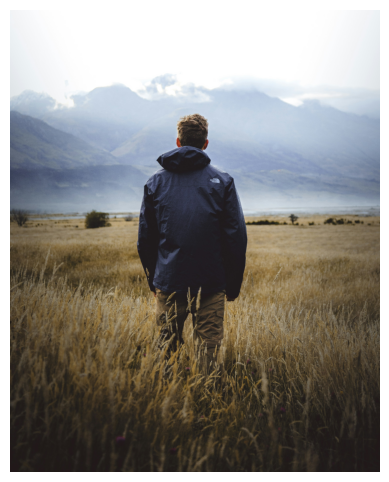

Caption: a man standing in a field of tall grass


In [5]:
url = "https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d"
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.show()

print("Caption:", generate_caption(image))

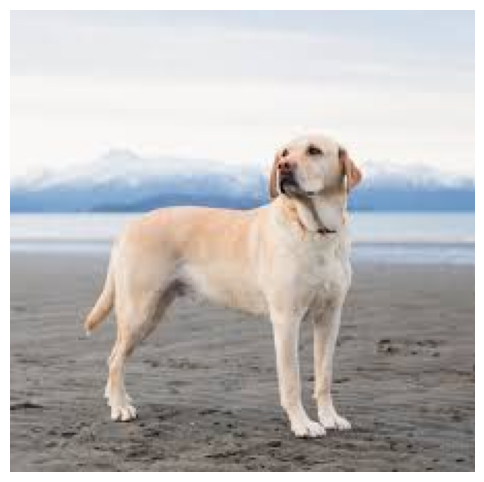

Caption: a dog standing on a beach


In [6]:
image_path = "images/dog.jpg"
image = Image.open(image_path).convert("RGB")

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.show()

print("Caption:", generate_caption(image))

In [7]:
def generate_multiple_captions(image, num=3):
    with torch.no_grad():
        inputs = processor(images=image, return_tensors="pt").to(device)
        outputs = model.generate(**inputs, num_beams=5, num_return_sequences=num)
    captions = [processor.decode(out, skip_special_tokens=True) for out in outputs]
    return captions

print("Multiple captions:")
for c in generate_multiple_captions(image):
    print("-", c)

Multiple captions:
- a dog standing on a beach with mountains in the background
- a dog standing on a sandy beach with mountains in the background
- a dog standing on the beach
